## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [1]:
from sklearn import datasets, metrics
import pandas as pd

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# 視覺化畫出決策樹的樹狀圖 Graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

import warnings 
warnings.filterwarnings('ignore')

## Iris

In [13]:
iris = datasets.load_iris()
X_train, X_test, y_train, y_test= train_test_split(iris.data, iris.target, test_size=0.2, random_state=123)

from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier(123)
param_grid = {"criterion" : ["entropy", "gini"],
              "max_depth" : [2,4,6,8,10],
              "min_samples_split" : [2,5,10],
              "min_samples_leaf" : [2,5,10] }

gs = GridSearchCV(estimator = DecisionTreeClassifier(random_state = 123),
                  param_grid = param_grid,
                  cv = 5,
                  scoring = "accuracy")
gs.fit(X_train, y_train)
print("best_score  : %s" % gs.best_score_)
print("best_params : %s \n" % gs.best_params_)

clf = gs.best_estimator_
clf.fit(X_train, y_train)
print("Test accuracy : %.4f" % clf.score(X_test, y_test))

best_score  : 0.9166666666666666
best_params : {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2} 

Test accuracy : 0.9667


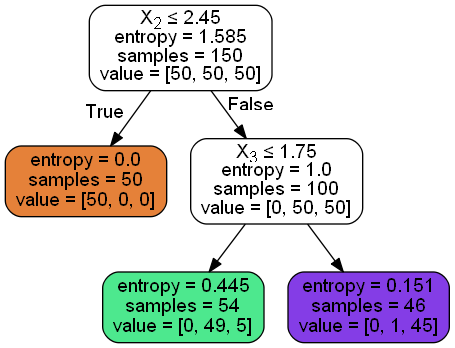

In [14]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# your model fit [df & y] (not X & y)
clf.fit(df, y)

# plot
dot_data = StringIO()
export_graphviz(clf, 
                out_file = dot_data,  
                filled = True, 
                rounded = True,
                special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Wine

In [15]:
wine = datasets.load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size = 0.3, random_state = 123)

clf = DecisionTreeClassifier(123)
param_grid = {"criterion" : ["entropy", "gini"],
              "max_depth" : [2,4,6,8,10],
              "min_samples_split" : [2,5,10],
              "min_samples_leaf" : [2,5,10] }

gs = GridSearchCV(estimator = DecisionTreeClassifier(random_state = 123),
                  param_grid = param_grid,
                  cv = 5,
                  scoring = "accuracy")
gs.fit(X_train, y_train)
print("best_score  : %s" % gs.best_score_)
print("best_params : %s \n" % gs.best_params_)

clf = gs.best_estimator_
clf.fit(X_train, y_train)
print("Test accuracy : %.4f" % clf.score(X_test, y_test))

best_score  : 0.8951612903225806
best_params : {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2} 

Test accuracy : 0.8889


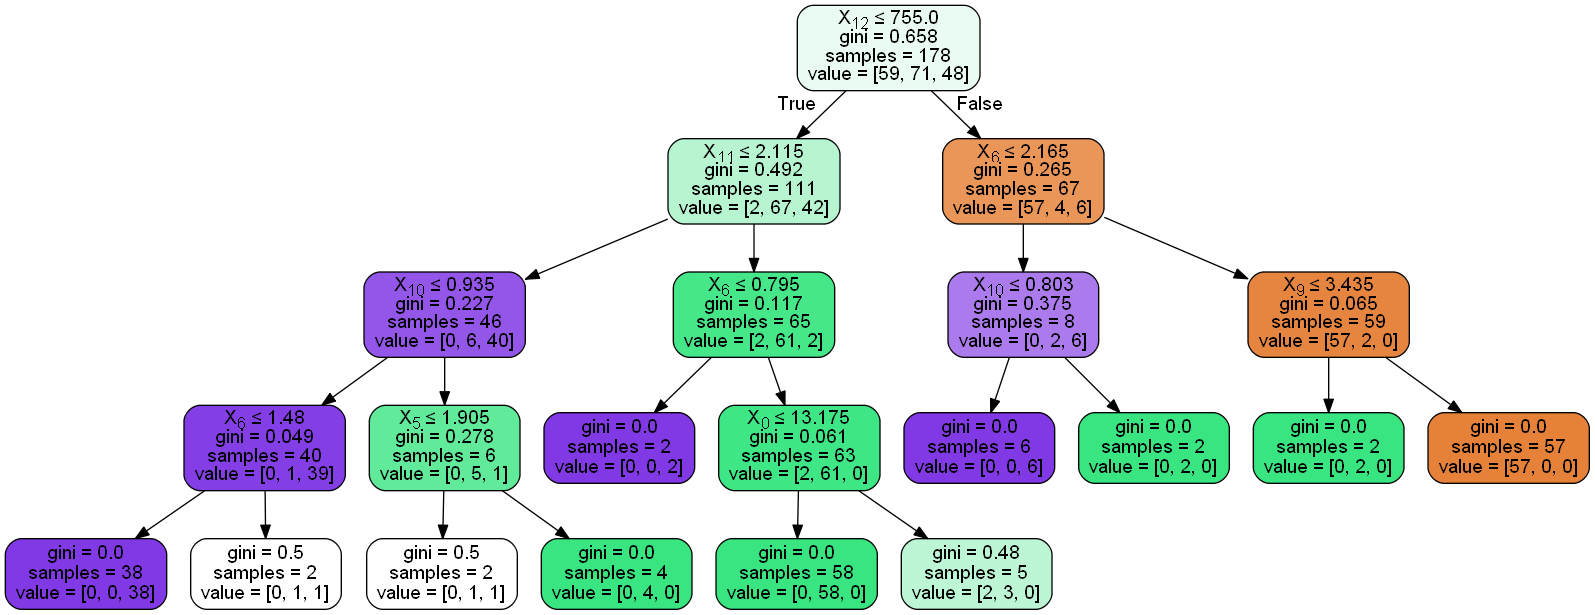

In [16]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target

# your model fit [df & y] (not X & y)
clf.fit(df, y)

# plot
dot_data = StringIO()
export_graphviz(clf, 
                out_file = dot_data,  
                filled = True, 
                rounded = True,
                special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Boston

In [20]:
boston = datasets.load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.25, random_state=123)

clf = DecisionTreeClassifier(random_state = 123)
param_grid = {"criterion" : ["mse", "mae"],
              "max_depth" : [2,4,6,8,10],
              "min_samples_split" : [2,5,10],
              "min_samples_leaf" : [2,5,10] 
             }
gs = GridSearchCV(estimator = DecisionTreeRegressor(random_state = 123),
                  param_grid = param_grid,
                  cv = 5,
                  scoring = "neg_mean_squared_error")
gs.fit(X_train, y_train)
print("best_score  : %s" % gs.best_score_)
print("best_params : %s \n" % gs.best_params_)

# 建立由目前training set找出最佳參數組合的模型
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print("neg_mean_squared_error : %.4f" % clf.score(X_test, y_test))

best_score  : -17.406950893714125
best_params : {'criterion': 'mse', 'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 2} 

neg_mean_squared_error : 0.6954
